<a href="https://colab.research.google.com/github/sujalsethi30/Sales4castr/blob/main/sales4castr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd


df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.dropna()

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots

train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

arima_model = SARIMAX(train['sales'], order=(1, 1, 1))
arima_fit = arima_model.fit(disp=False)
arima_pred = arima_fit.forecast(len(test))

sarima_model = SARIMAX(train['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(len(test))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

metrics = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA'],
    'MSE': [mean_squared_error(test['sales'], arima_pred),
            mean_squared_error(test['sales'], sarima_pred)],
    'RMSE': [np.sqrt(mean_squared_error(test['sales'], arima_pred)),
             np.sqrt(mean_squared_error(test['sales'], sarima_pred))],
    'MAE': [mean_absolute_error(test['sales'], arima_pred),
            mean_absolute_error(test['sales'], sarima_pred)],
    'R2': [r2_score(test['sales'], arima_pred),
           r2_score(test['sales'], sarima_pred)]
})

metrics


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Model,MSE,RMSE,MAE,R2
0,ARIMA,9.112758e+06,3018.734422,2368.785883,-0.586661
1,SARIMA,1.410912e+06,1187.818007,1024.209354,0.754340


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


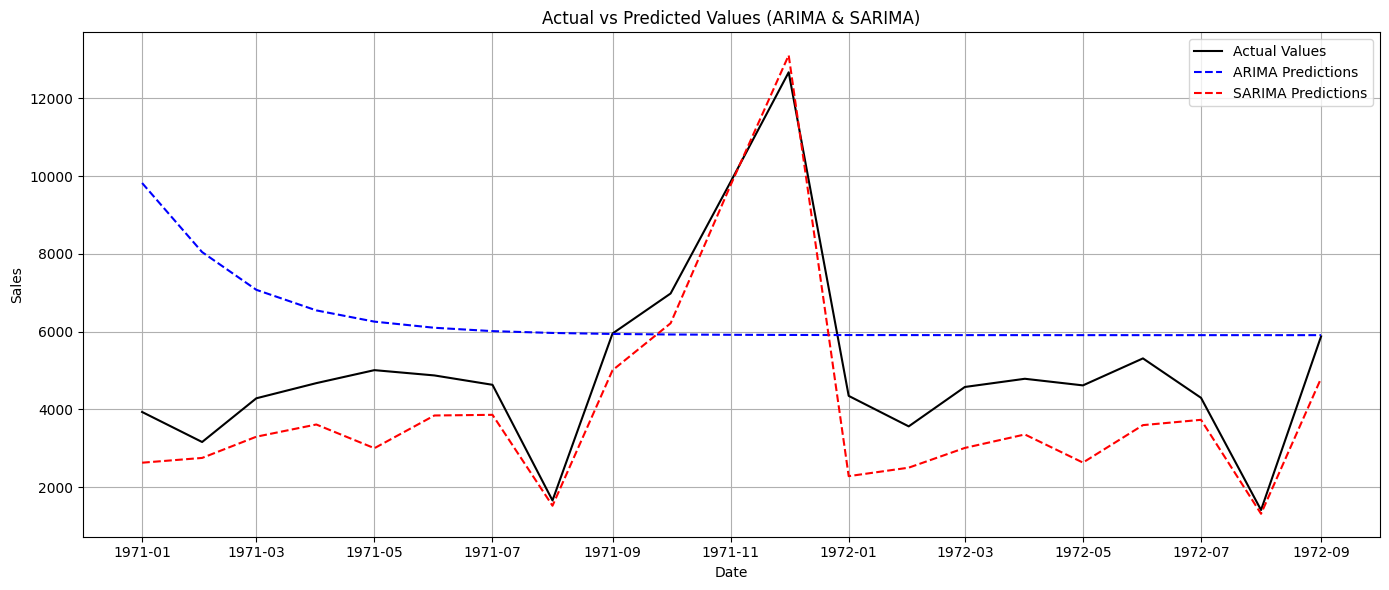

In [ ]:

import pandas as pd

df = pd.read_csv("/content/sample_data/dataset.csv")


df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.dropna()


train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(train['sales'], order=(1, 1, 1))
arima_fit = arima_model.fit(disp=False)
arima_pred = arima_fit.forecast(len(test))


sarima_model = SARIMAX(train['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(len(test))

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test.index, test['sales'], label="Actual Values", color='black')
plt.plot(test.index, arima_pred, label="ARIMA Predictions", color='blue', linestyle='--')
plt.plot(test.index, sarima_pred, label="SARIMA Predictions", color='red', linestyle='--')

plt.title('Actual vs Predicted Values (ARIMA & SARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


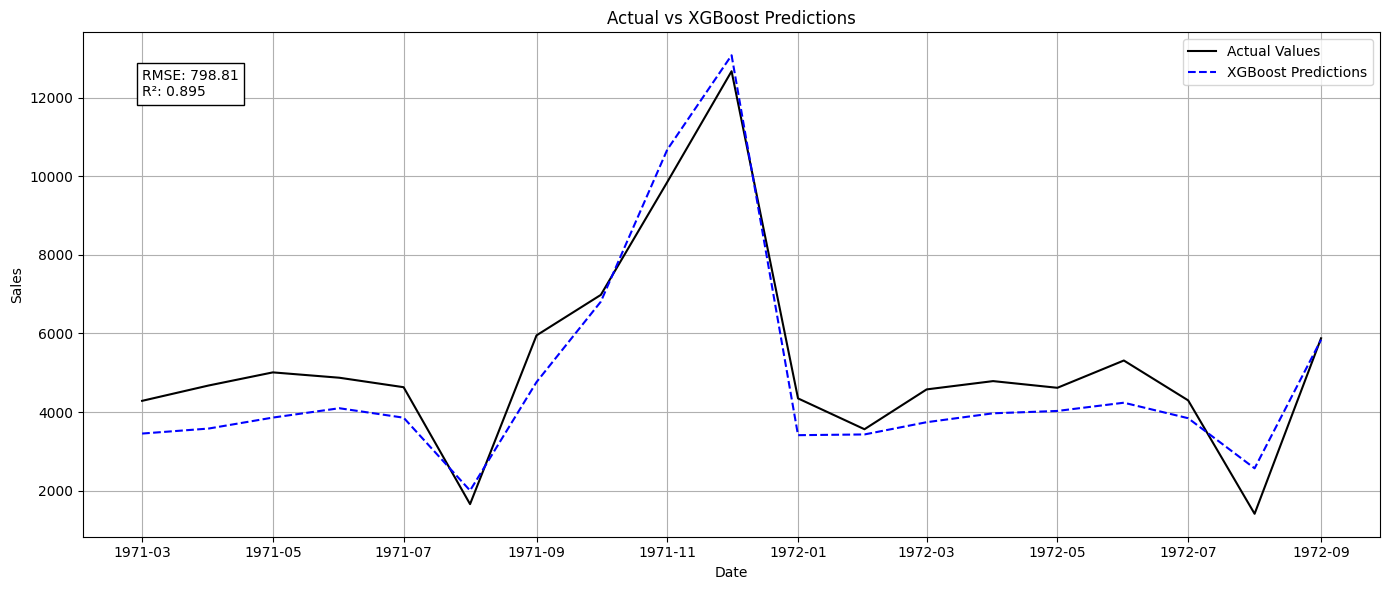

In [ ]:

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()


X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']

train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_test = df['date'][train_size:]


xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)


predictions = xgb_model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, label='Actual Values', color='black')
plt.plot(dates_test, predictions, label='XGBoost Predictions', color='blue', linestyle='--')

plt.title('Actual vs XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()


plt.text(dates_test.iloc[0], max(y_test)*0.95,
         f'RMSE: {rmse:.2f}\nR²: {r2:.3f}',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


In [ ]:

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()


X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']


train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)


predictions = xgb_model.predict(X_test)


metrics = pd.DataFrame({
    'Model': ['XGBoost'],
    'MSE': [mean_squared_error(y_test, predictions)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, predictions))],
    'R2': [r2_score(y_test, predictions)]
})

metrics


,Model,MSE,RMSE,R2
0,XGBoost,638098.8125,798.810874,0.894747


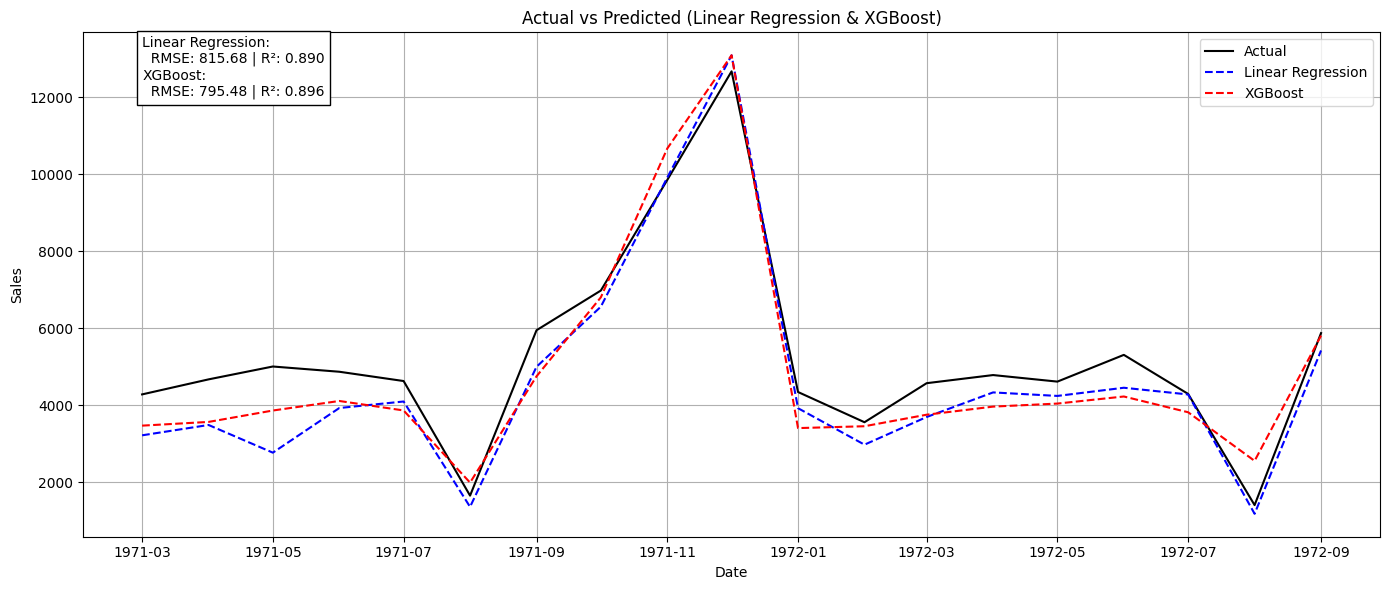

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()

X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']

train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_test = df['date'][train_size:]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

xgb_model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, label='Actual', color='black')
plt.plot(dates_test, lr_predictions, label='Linear Regression', linestyle='--', color='blue')
plt.plot(dates_test, xgb_predictions, label='XGBoost', linestyle='--', color='red')

plt.title('Actual vs Predicted (Linear Regression & XGBoost)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

metrics_text = (f'Linear Regression:\n  RMSE: {lr_rmse:.2f} | R²: {lr_r2:.3f}\n'
                f'XGBoost:\n  RMSE: {xgb_rmse:.2f} | R²: {xgb_r2:.3f}')

plt.text(dates_test.iloc[0], max(y_test)*0.95, metrics_text,
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("/content/sample_data/dataset.csv")


df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()


X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']


train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
mae = mean_absolute_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)


print("Linear Regression Evaluation Metrics:")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.3f}")


Linear Regression Evaluation Metrics:
Test RMSE: 815.68
Test MAE : 649.26
Test R²  : 0.890


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()

X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']
dates = df['date']

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_test = dates[train_size:]

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)

plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, label='Actual Sales', color='black')
plt.plot(dates_test, test_pred, label='Random Forest Prediction', linestyle='--', color='green')

plt.title('Actual vs Random Forest Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

metrics_text = (f'Random Forest Metrics:\n'
                f'Train RMSE: {train_rmse:.2f}\n'
                f'Test RMSE: {test_rmse:.2f}\n'
                f'R² Score: {test_r2:.3f}')
plt.text(dates_test.iloc[0], max(y_test) * 0.95, metrics_text,
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


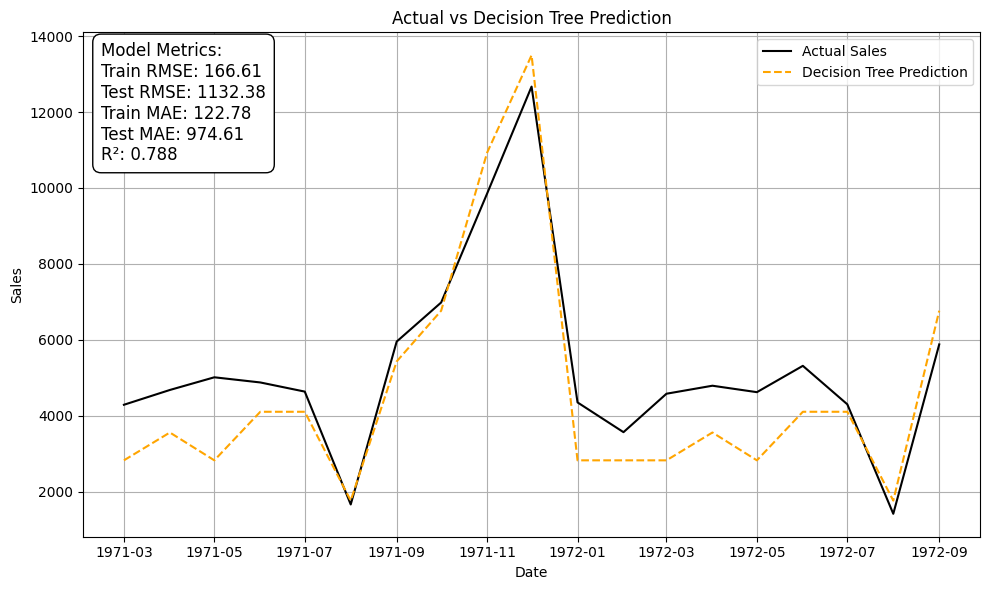


Model Performance Metrics:
       Metric     Value
0  Train RMSE   166.613
1   Test RMSE  1132.381
2   Train MAE   122.784
3    Test MAE   974.614
4    R² Score     0.788


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()

X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

test_r2 = r2_score(y_test, test_pred)

plt.figure(figsize=(10, 6))

plt.plot(df['date'][train_size:], y_test, color='black', label="Actual Sales")
plt.plot(df['date'][train_size:], test_pred, color='orange', linestyle='--', label="Decision Tree Prediction")

plt.title('Actual vs Decision Tree Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

plt.text(0.02, 0.98, f'Model Metrics:\nTrain RMSE: {train_rmse:.2f}\nTest RMSE: {test_rmse:.2f}\n'
                     f'Train MAE: {train_mae:.2f}\nTest MAE: {test_mae:.2f}\nR²: {test_r2:.3f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

print("\nModel Performance Metrics:")
metrics_df = pd.DataFrame({
    'Metric': ['Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'R² Score'],
    'Value': [train_rmse, test_rmse, train_mae, test_mae, test_r2]
})
metrics_df['Value'] = metrics_df['Value'].round(3)
print(metrics_df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'])
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()
X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_values = [3, 5, 7, 9, 11]
results = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_model.fit(X_train_scaled, y_train)

    train_pred = knn_model.predict(X_train_scaled)
    test_pred = knn_model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    results.append({
        'k': k,
        'Train RMSE': round(train_rmse, 2),
        'Test RMSE': round(test_rmse, 2),
        'Train MAE': round(train_mae, 2),
        'Test MAE': round(test_mae, 2),
        'Train R²': round(train_r2, 3),
        'Test R²': round(test_r2, 3)
    })


results_df = pd.DataFrame(results)

best_k = results_df.loc[results_df['Test RMSE'].idxmin(), 'k']
best_knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
best_knn.fit(X_train_scaled, y_train)
final_pred = best_knn.predict(X_test_scaled)


plt.figure(figsize=(12, 6))
plt.plot(df['date'][train_size:], y_test, color='black', label="Actual Values")
plt.plot(df['date'][train_size:], final_pred, color='cyan', linestyle='--', label=f"KNN (k={best_k}) Predictions")
plt.title('KNN Analysis of Champagne Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("\nDetailed Results for Different k Values:")
print(results_df)


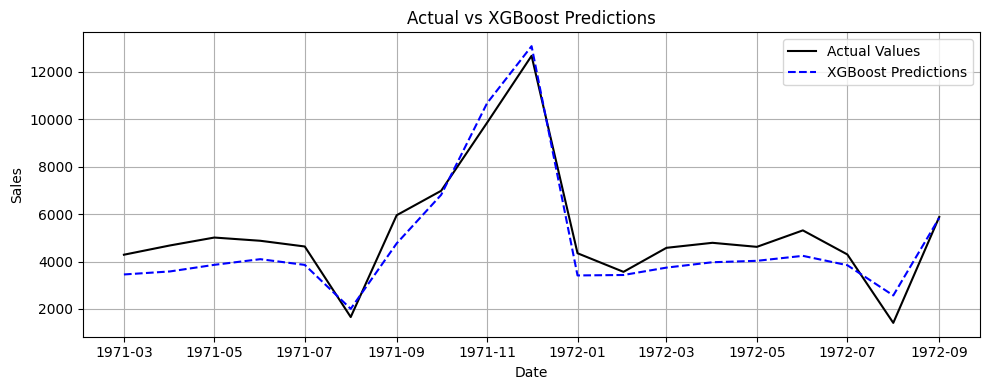

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/dataset.csv")

df.columns = ['date', 'sales']
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

for i in range(1, 13):
    df[f'lag_{i}'] = df['sales'].shift(i)

df = df.dropna()

X = df[['year', 'month', 'day'] + [f'lag_{i}' for i in range(1, 13)]]
y = df['sales']

train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_test = df['date'][train_size:]

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

# Metrics calculation (still here for your reference)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Smaller plot with no RMSE/R² label
plt.figure(figsize=(10, 4))
plt.plot(dates_test, y_test, label='Actual Values', color='black')
plt.plot(dates_test, predictions, label='XGBoost Predictions', color='blue', linestyle='--')
plt.title('Actual vs XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
